In [1]:
# use a VARMA(p,q) model to forecast realdpi and realcons
# The VARMA(p,q) model can be seen as a generalization of the ARMA(p,q) model that allows for multiple time series.
# Explore the relationship between real disposable income and real consumption

In [2]:
# Import time module
from datetime import datetime as dt

start = dt.now()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

In [3]:
# Macroeconomics dataset from the United States, collected quarterly from 1959 to 2009, to forecast the real GDP
# This dataset is available with the statsmodels library

import statsmodels.api as sm
econ_data = sm.datasets.macrodata.load_pandas().data
econ_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
econ_data.describe()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


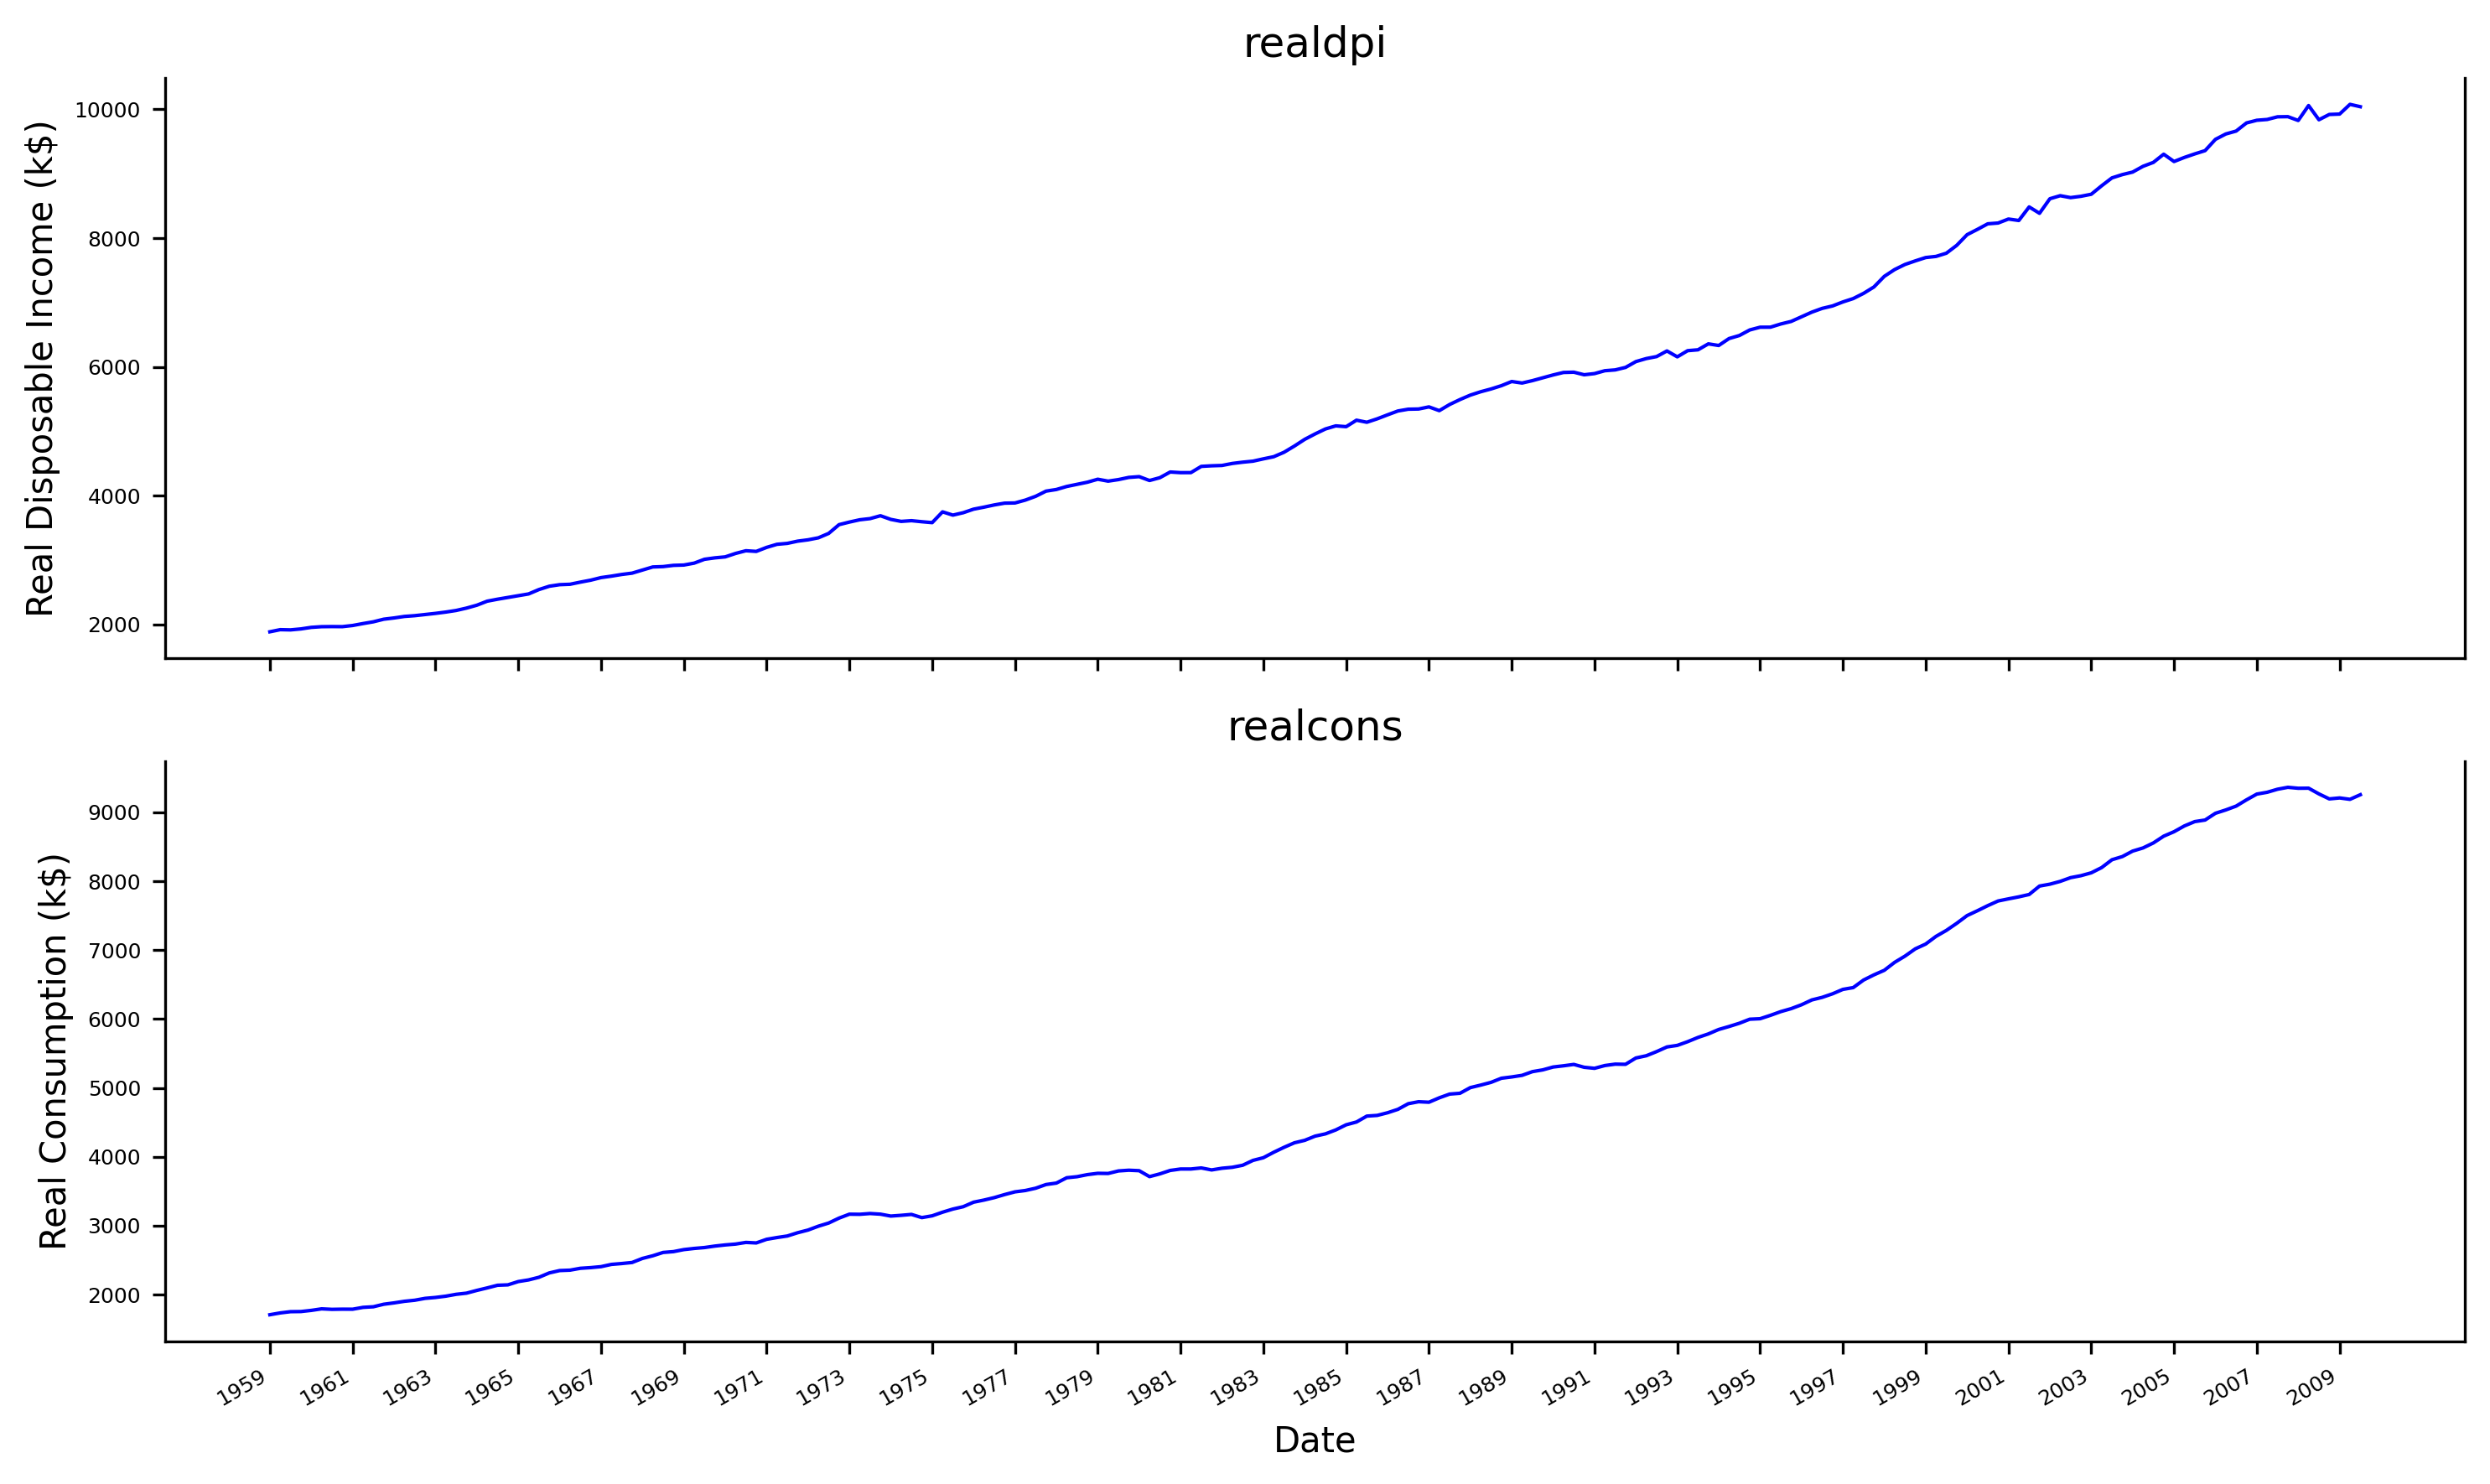

In [5]:
# Plot the two variables of interest i.e. realgdp, realcons

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, dpi=300, figsize=(10,6))

ax1.plot(econ_data['realdpi'], color='blue', linewidth=1)
ax1.set_title("realdpi")
ax1.set_xlabel("Date")
ax1.set_ylabel("Real Disposable Income (k$)")
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)

ax2.plot(econ_data['realcons'], color='blue', linewidth=1)
ax2.set_title("realcons")
ax2.set_xlabel("Date")
ax2.set_ylabel("Real Consumption (k$)")
ax2.spines['top'].set_alpha(0)
ax2.tick_params(labelsize=6)

plt.xticks(np.arange(0, 208, 8), np.arange(1959, 2010, 2))

fig.autofmt_xdate()
plt.tight_layout()

In [6]:
# Both curves have a very similar shape through time, which intuitively makes them good candidates for a VAR(p) model
# We must first determine if the time series are stationary.

adf_result1 = adfuller(econ_data['realdpi'])

print('realdpi')
print(f'ADF statistic: {adf_result1[0]}')
print(f'p-value: {adf_result1[1]}')

print('\n---------------------\n')

adf_result2 = adfuller(econ_data['realcons'])

print('realcons')
print(f'ADF statistic: {adf_result2[0]}')
print(f'p-value: {adf_result2[1]}')

realdpi
ADF statistic: 2.9860253519546878
p-value: 1.0

---------------------

realcons
ADF statistic: 1.5499123380509559
p-value: 0.9976992503412904


In [7]:
# Both the are not statitionery - >ADF statistic is not a large negative number and p-value is greater than 0.05..
# So we apply differentiation to make them stationery

# First-order differencing for realdpi
adf_result1 = adfuller(econ_data['realdpi'].diff()[1:])

print('realdpi')
print(f'ADF statistic: {adf_result1[0]}')
print(f'p-value: {adf_result1[1]}')

print('\n---------------------\n')

# First-order differencing for realcons
adf_result2 = adfuller(econ_data['realcons'].diff()[1:])

print('realcons')
print(f'ADF statistic: {adf_result2[0]}')
print(f'p-value: {adf_result2[1]}')

realdpi
ADF statistic: -8.864893340673012
p-value: 1.449360615910768e-14

---------------------

realcons
ADF statistic: -4.2043060808452495
p-value: 0.0006479282158627493


In [8]:
# With large negative ADF statistic and p-value smaller than 0.05, we can conclude that both the series are now stationary.
# We will use the transformed series for modeling, and we will need to integrate the forecasts to bring them back to 
# their original scales
# Next we fit many VAR(p) models to select the one with the smallest Akaike information criterion (AIC)

In [9]:
# Function to fit different VARMA(p,q) models 

from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.varmax import VARMAX

def optimize_VARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    results = []

     # Iterate over each unique (p,q) combination. The use of tqdm will display a progress bar
        
    for order in tqdm(order_list):
        try:
            #model = VARMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)            
            model = VARMAX(endog, order=(order[0], 0, order[1])).fit(disp=False)            
        except:
            continue

        aic = model.aic
        results.append([order, aic])
    
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [10]:
# define a list of possible values for p and q
from itertools import product

ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))
print(order_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


In [11]:
import warnings
warnings.filterwarnings("ignore")

# Define the train and test sets - use 80% of the data for training and 20% for testing
# Note: Since VARMA(p,q) model requires both series to be stationary, the split is done on the differenced dataset

# select only realdpi and realcons - the two variables of interest in this case
endog = econ_data[['realdpi', 'realcons']]

endog_diff = econ_data[['realdpi', 'realcons']].diff()[1:]

# The first 162 data points go for training (about 80% of the dataset)
train = endog_diff[:162].copy()
test = endog_diff[162:].copy()

# Run the optimize_VARMA function using the differenced data stored in train as required for the VARMA(p) model
result_df = optimize_VARMA(train, order_list)
result_df

,"(p,q)",AIC
0,"(3, 0)",3123.070069
1,"(3, 1)",3123.070069
2,"(3, 2)",3123.070069
3,"(3, 3)",3123.070069
4,"(2, 0)",3130.091668
5,"(2, 1)",3130.091668
6,"(2, 2)",3130.091668
7,"(2, 3)",3130.091668
8,"(1, 0)",3134.333343
9,"(1, 1)",3134.333343


In [12]:
# The results show that (p,q)=(3,0),(3,1),(3,2) and (3,3) all have the same and lowest AIC value. 
# So we will use a VARMA(3, 1) model because VARMA(3,0) is like VAR(3) whose results we already have.
p=3
q=1

In [13]:
# Next we use Granger causality test to test the relationship between realdpi & realcons
# Granger causality test checks if the second variable causes the first one (The test must be run both ways)
# We pass the value of p to maxlag attibute in the grangercausalitytests function
from statsmodels.tsa.stattools import grangercausalitytests

# We test if realcons Granger-causes realdpi
print('realcons Granger-causes realdpi ?\n')
print('------------------')
granger_1 = grangercausalitytests(econ_data[['realcons', 'realdpi']].diff()[1:], [p])

# We test if realdpi Granger-causes realcons
print('\nrealdpi Granger-causes realcons ?\n')
print('------------------')
granger_2 = grangercausalitytests(econ_data[['realdpi', 'realcons']].diff()[1:], [p])

realcons Granger-causes realdpi ?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=8.7625  , p=0.0326  , df=3
likelihood ratio test: chi2=8.5751  , p=0.0355  , df=3
parameter F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3

realdpi Granger-causes realcons ?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=28.7191 , p=0.0000  , df=3
likelihood ratio test: chi2=26.8268 , p=0.0000  , df=3
parameter F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3


In [14]:
# Both the tests return a p-value smaller than 0.05. 
# Therefore, we conclude that realdpi Granger-causes realcons, and realcons Granger-causes realdpi 
# Our VARMa(3,1) model is thus valid, move on to residual analysis. We first fit the VARMA(3,1) model on our train setbest

best_model = VARMAX(train, order=(p,q))
best_model_fit = best_model.fit(disp=False)

print(best_model_fit.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realdpi', 'realcons']   No. Observations:                  162
Model:                          VARMA(3,1)   Log Likelihood               -1543.500
                               + intercept   AIC                           3129.000
Date:                     Thu, 19 Oct 2023   BIC                           3193.839
Time:                             12:37:17   HQIC                          3155.326
Sample:                                  0                                         
                                     - 162                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.01, 0.03   Jarque-Bera (JB):          60.94, 4.48
Prob(Q):                        0.93, 0.87   Prob(JB):                   0.00, 0.11
Heteroskedasticity (H):         4.53, 3.81   Skew:                      0.04

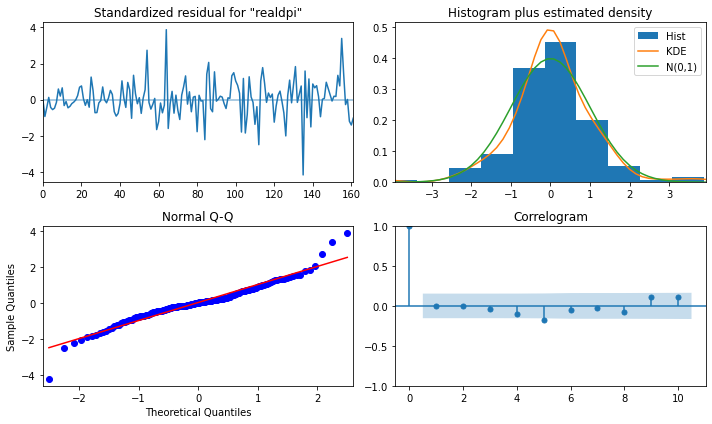

In [15]:
# We plot histograms of the residuals, the Q-Q plot & correlogram
# The residuals of the two variables are studied separately i.e. pass different values (0,1) for the "variable" parameter

best_model_fit.plot_diagnostics(figsize=(10,6), variable=0)
plt.tight_layout()

In [16]:
# Residuals analysis of realdpi. 
# The standardized residuals seem to have no trend and constant variance, which is in line with white noise. 
# The histogram also closely resembles the shape of a normal distribution. 
# The Q-Q plot supports this with a fairly straight line that lies on y = x, though we see some curvature at the extremities. 
# Finally, the correlogram shows no significant coefficients except at lag 5. However, this is likely due to chance, 
# since there are no preceding significant coefficients. 

#Thus, we can conclude that the residuals are close to white noise

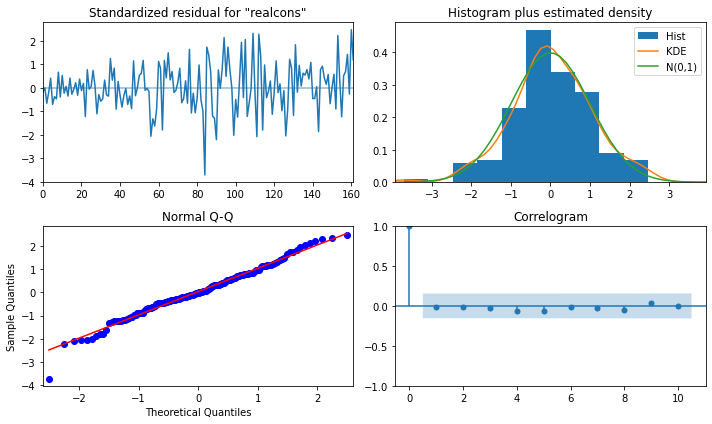

In [17]:
best_model_fit.plot_diagnostics(figsize=(10,6), variable=1)
plt.tight_layout()

In [18]:
# Residuals analysis of realcons. 
# The top-left plot shows the residuals over time - there is no trend and constant variance (behavior of white noise).
# At the top right, the distribution is very close to a normal distribution. 
# Q-Q plot at the bottom left supports this with a fairly straight line that lies on y = x. 
# Finally, the correlogram shows that there are no significant autocorrelation coefficients after lag 0.
# Therefore, the residuals are close to white noise.

In [19]:
# Next we perform quantitative analysis using the Ljung-Box test to if the residuals are independent and uncorrelated
# The test must be applied on both realdpi and realcons
from statsmodels.stats.diagnostic import acorr_ljungbox

realdpi_residuals = best_model_fit.resid['realdpi']

realdpi_pvalue = acorr_ljungbox(realdpi_residuals, np.arange(1, 11, 1), return_df=True)
realdpi_pvalue.columns = ['stat','p-value']
realdpi_pvalue

,stat,p-value
1,0.007014,0.933258
2,0.015698,0.992182
3,0.204471,0.976864
4,2.047711,0.726984
5,7.642821,0.177050
6,8.000314,0.238080
7,8.161774,0.318545
8,9.246028,0.321969
9,11.511577,0.242265
10,13.739636,0.185202


In [20]:
realcons_residuals = best_model_fit.resid['realcons']

realcons_pvalue = acorr_ljungbox(realcons_residuals, np.arange(1,11,1), return_df=True)
realcons_pvalue.columns = ['stat', 'p-value']
realcons_pvalue

,stat,p-value
1,0.025838,0.872295
2,0.073798,0.963773
3,0.265401,0.966399
4,0.496010,0.973888
5,0.519857,0.991378
6,0.561281,0.997011
7,0.733086,0.998068
8,1.680378,0.989293
9,1.966942,0.991980
10,1.974349,0.996533


In [21]:
# In both cases the p-values returned are all greater than 0.05, 
# meaning that the residuals are not correlated and are independent, just like white noise
# The model has passed both the qualitative and quantitative aspects of residual analysis, 
# Next we forecast realcons and realdpi using a VARMA(3,1) model (our baseline will be the last observed value)
# We forecast 4 steps into the future(equivalent to forecasting one full year)

In [22]:
# Function for rolling forecasts over a test set

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'VARMA':
        # Initialize two empty lists to hold the predictions for realdpi and realcons
        realdpi_pred_VARMA = []
        realcons_pred_VARMA = []
        
        for i in range(train_len, total_len, window):
            model = VARMAX(df[:i], order=(3,1))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            
            #Extract the predictions for realdpi
            oos_pred_realdpi = predictions.predicted_mean.iloc[-window:]['realdpi']
            #Extract the predictions for realcons
            oos_pred_realcons = predictions.predicted_mean.iloc[-window:]['realcons']
            
            #Extend the lists with the new predictions for each variable
            realdpi_pred_VARMA.extend(oos_pred_realdpi)
            realcons_pred_VARMA.extend(oos_pred_realcons)
        
        #Return both lists of predictions for realdpi and realcons
        return realdpi_pred_VARMA, realcons_pred_VARMA
    
    if method == 'VAR':
        # Initialize two empty lists to hold the predictions for realdpi and realcons
        realdpi_pred_VAR = []
        realcons_pred_VAR = []
        
        for i in range(train_len, total_len, window):
            model = VARMAX(df[:i], order=(3,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            
            #Extract the predictions for realdpi
            oos_pred_realdpi = predictions.predicted_mean.iloc[-window:]['realdpi']
            #Extract the predictions for realcons
            oos_pred_realcons = predictions.predicted_mean.iloc[-window:]['realcons']
            
            #Extend the lists with the new predictions for each variable
            realdpi_pred_VAR.extend(oos_pred_realdpi)
            realcons_pred_VAR.extend(oos_pred_realcons)
        
        #Return both lists of predictions for realdpi and realcons
        return realdpi_pred_VAR, realcons_pred_VAR

    elif method == 'last':
        #For the baseline, we’ll also use two lists to hold the predictions for each variable and return them at the end
        realdpi_pred_last = []
        realcons_pred_last = []
        
        for i in range(train_len, total_len, window):
            realdpi_last = df[:i].iloc[-1]['realdpi']
            realcons_last = df[:i].iloc[-1]['realcons']
            
            realdpi_pred_last.extend(realdpi_last for _ in range(window))
            realcons_pred_last.extend(realcons_last for _ in range(window))

        return realdpi_pred_last, realcons_pred_last


In [23]:
TRAIN_LEN = len(train)
HORIZON = len(test)

# The window is 4, since we want to forecast four time steps into the future at a time, which is equivalent to 1 year
WINDOW = 4

print(TRAIN_LEN)
print(HORIZON)

162
40


In [24]:
# Now produce the forecasts for realdpi and realcons using the VARMA(3,1) model

realdpi_pred_VARMA, realcons_pred_VARMA = rolling_forecast(endog_diff, TRAIN_LEN, HORIZON, WINDOW, 'VARMA')

In [25]:
# We were using stationery data to perform forecasts. 
# Now use the cumulative sum to integrate them and bring them back to the original scale of the data

test = endog[163:]

test['realdpi_pred_VARMA'] = pd.Series()
test['realcons_pred_VARMA'] = pd.Series()

# Integrate the forecasts using the cumulative sum
test['realdpi_pred_VARMA'] = endog.iloc[162]['realdpi'] + np.cumsum(realdpi_pred_VARMA)
test['realcons_pred_VARMA'] = endog.iloc[162]['realcons'] + np.cumsum(realcons_pred_VARMA)
test.head()

,realdpi,realcons,realdpi_pred_VARMA,realcons_pred_VARMA
163,7887.7,7389.2,7834.573687,7353.869708
164,8053.4,7501.3,7898.657833,7427.753762
165,8135.9,7571.8,7968.796527,7492.423899
166,8222.3,7645.9,8019.326596,7550.663096
167,8234.6,7713.5,8077.716284,7625.599020


In [26]:
# Now produce the forecasts for realdpi and realcons using the VAR(3) model

realdpi_pred_VAR, realcons_pred_VAR = rolling_forecast(endog_diff, TRAIN_LEN, HORIZON, WINDOW, 'VAR')

# We were using stationery data to perform forecasts. 
# Now use the cumulative sum to integrate them and bring them back to the original scale of the data

test['realdpi_pred_VAR'] = pd.Series()
test['realcons_pred_VAR'] = pd.Series()

# Integrate the forecasts using the cumulative sum
test['realdpi_pred_VAR'] = endog.iloc[162]['realdpi'] + np.cumsum(realdpi_pred_VAR)
test['realcons_pred_VAR'] = endog.iloc[162]['realcons'] + np.cumsum(realcons_pred_VAR)
test.head()

,realdpi,realcons,realdpi_pred_VARMA,realcons_pred_VARMA,realdpi_pred_VAR,realcons_pred_VAR
163,7887.7,7389.2,7834.573687,7353.869708,7829.231245,7354.333601
164,8053.4,7501.3,7898.657833,7427.753762,7897.202533,7430.273110
165,8135.9,7571.8,7968.796527,7492.423899,7960.582960,7496.654581
166,8222.3,7645.9,8019.326596,7550.663096,8014.783948,7556.649411
167,8234.6,7713.5,8077.716284,7625.599020,8080.730031,7631.032742


In [27]:
# Next Use rolling_forecast to obtain the baseline predictions using the last known value

realdpi_pred_last, realcons_pred_last = rolling_forecast(endog, TRAIN_LEN, HORIZON, WINDOW, 'last')

test['realdpi_pred_last'] = realdpi_pred_last
test['realcons_pred_last'] = realcons_pred_last

test.head()

,realdpi,realcons,realdpi_pred_VARMA,realcons_pred_VARMA,realdpi_pred_VAR,realcons_pred_VAR,realdpi_pred_last,realcons_pred_last
163,7887.7,7389.2,7834.573687,7353.869708,7829.231245,7354.333601,7716.0,7199.9
164,8053.4,7501.3,7898.657833,7427.753762,7897.202533,7430.273110,7716.0,7199.9
165,8135.9,7571.8,7968.796527,7492.423899,7960.582960,7496.654581,7716.0,7199.9
166,8222.3,7645.9,8019.326596,7550.663096,8014.783948,7556.649411,7716.0,7199.9
167,8234.6,7713.5,8077.716284,7625.599020,8080.730031,7631.032742,8135.9,7571.8


In [28]:
test.describe()

,realdpi,realcons,realdpi_pred_VARMA,realcons_pred_VARMA,realdpi_pred_VAR,realcons_pred_VAR,realdpi_pred_last,realcons_pred_last
count,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,9135.072500,8548.23500,8769.687803,8404.561342,8844.258326,8393.412966,8948.400000,8370.440000
std,665.749342,640.10207,560.368576,589.760611,594.909577,586.203205,739.898395,714.983819
min,7887.700000,7389.20000,7834.573687,7353.869708,7829.231245,7354.333601,7716.000000,7199.900000
25%,8624.800000,7987.67500,8269.984035,7929.866946,8326.767010,7920.638884,8273.700000,7773.500000
50%,9182.750000,8605.00000,8735.012813,8418.173353,8837.190020,8394.764086,8963.750000,8340.500000
75%,9827.650000,9190.57500,9298.647645,8967.074832,9383.850032,8949.004624,9617.300000,9035.000000
max,10077.500000,9363.60000,9597.558704,9225.047289,9707.051763,9214.741391,10059.000000,9351.000000


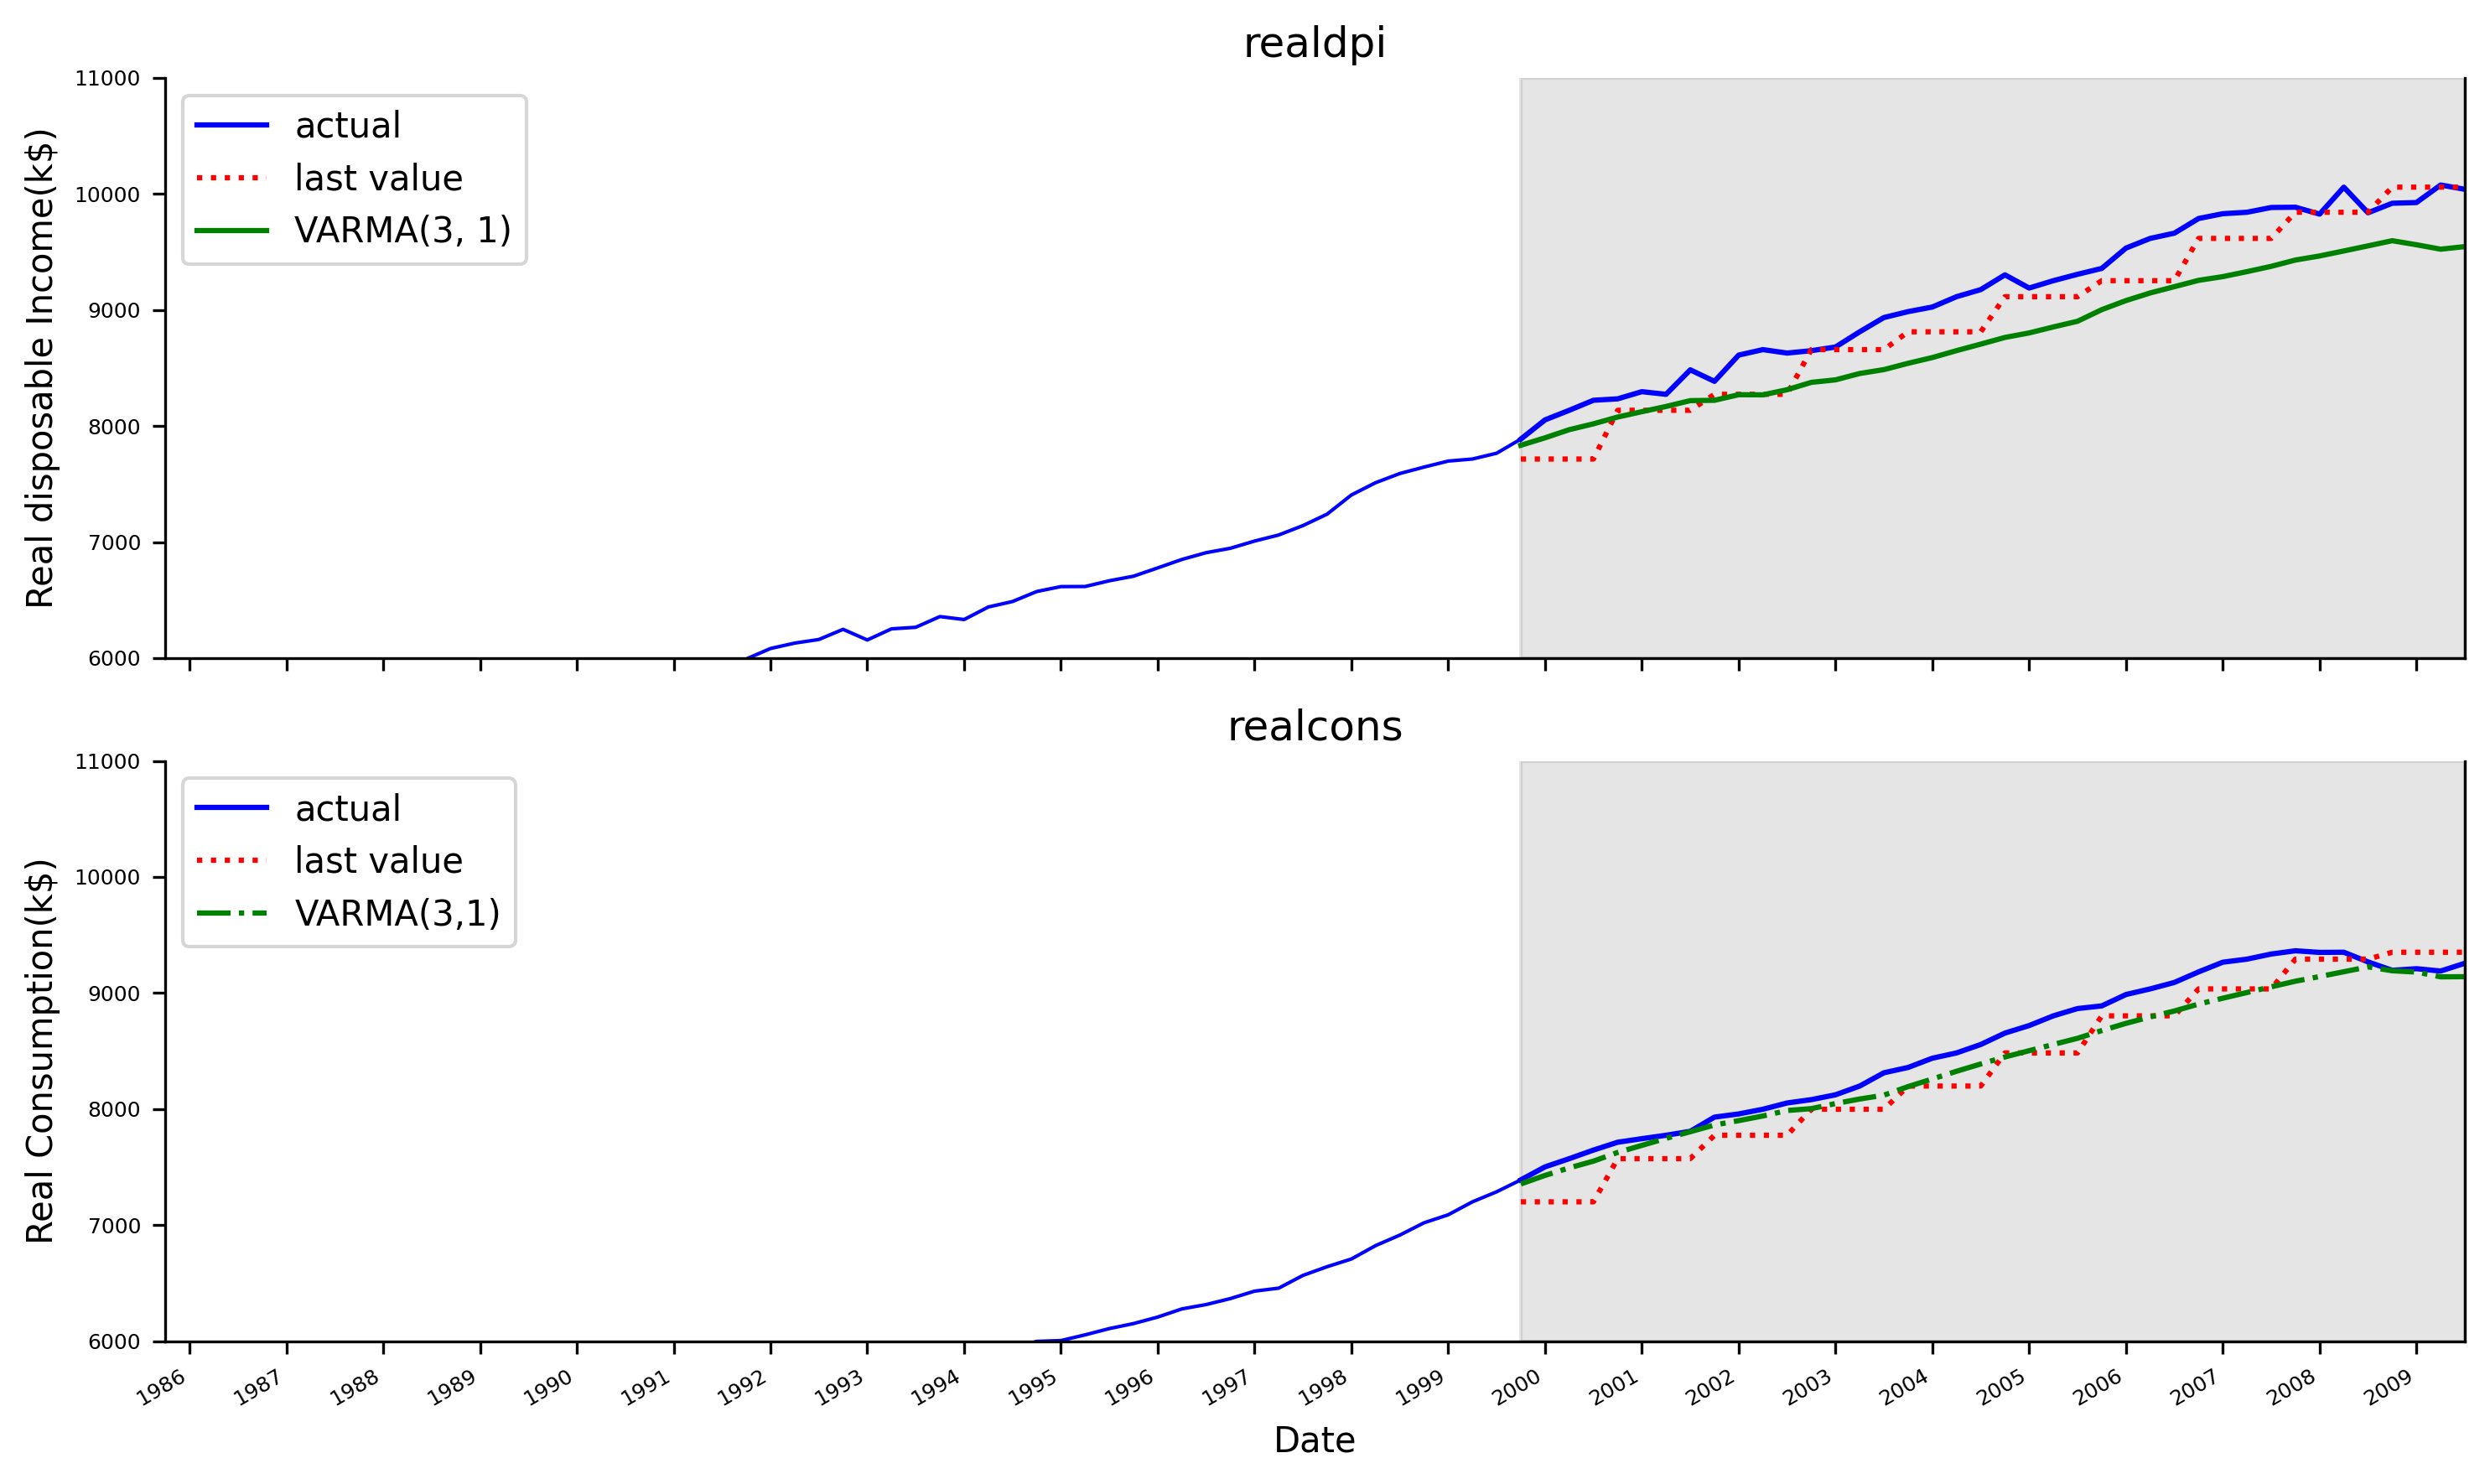

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, dpi=300, figsize=(10,6))

ax1.plot(econ_data['realdpi'][:197], color='blue', linewidth=1)
ax1.plot(test['realdpi'], 'b-', label='actual')
ax1.plot(test['realdpi_pred_last'], 'r:', label='last value')
ax1.plot(test['realdpi_pred_VARMA'], 'g-', label = 'VARMA(3, 1)')

ax1.set_title("realdpi")
ax1.set_xlabel("Date")
ax1.set_ylabel("Real disposable Income(k$)")
ax1.spines['top'].set_alpha(0)
ax1.tick_params(labelsize=6)
ax1.axvspan(163, 202, color='#808080', alpha=0.2)

ax1.legend(loc=2)

ax2.plot(econ_data['realcons'][:197], color='blue', linewidth=1)
ax2.plot(test['realcons'], 'b-', label='actual')
ax2.plot(test['realcons_pred_last'], 'r:', label='last value')
ax2.plot(test['realcons_pred_VARMA'], 'g-.', label='VARMA(3,1)')

ax2.set_title("realcons")
ax2.set_xlabel("Date")
ax2.set_ylabel("Real Consumption(k$)")
ax2.spines['top'].set_alpha(0)
ax2.tick_params(labelsize=6)
ax2.axvspan(163, 202, color='#808080', alpha=0.2)

ax2.legend(loc=2)

plt.xticks(np.arange(0, 202, 4), np.arange(1959, 2010, 1))

ax1.set_xlim(107, 202)
ax1.set_ylim(6000, 11000)

ax2.set_xlim(107, 202)
ax2.set_ylim(6000, 11000)

fig.autofmt_xdate()
plt.tight_layout()


In [30]:
# function to compute the MAPE - Mean Absolute Percentage Error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
# compute the MAPE
mape_realdpi_VARMA = mape(test['realdpi'], test['realdpi_pred_VARMA'])
mape_realdpi_VAR = mape(test['realdpi'], test['realdpi_pred_VAR'])
mape_realdpi_last = mape(test['realdpi'], test['realdpi_pred_last'])
print("realdpi", mape_realdpi_VARMA, mape_realdpi_VAR, mape_realdpi_last)

mape_realcons_VARMA = mape(test['realcons'], test['realcons_pred_VARMA'])
mape_realcons_VAR = mape(test['realcons'], test['realcons_pred_VAR'])
mape_realcons_last = mape(test['realcons'], test['realcons_pred_last'])
print("realcons", mape_realcons_VARMA, mape_realcons_VAR, mape_realcons_last)

realdpi 3.9304521439564777 3.138313092825666 2.262617433128667
realcons 1.6412676126214811 1.7710833475340033 2.459315021191507


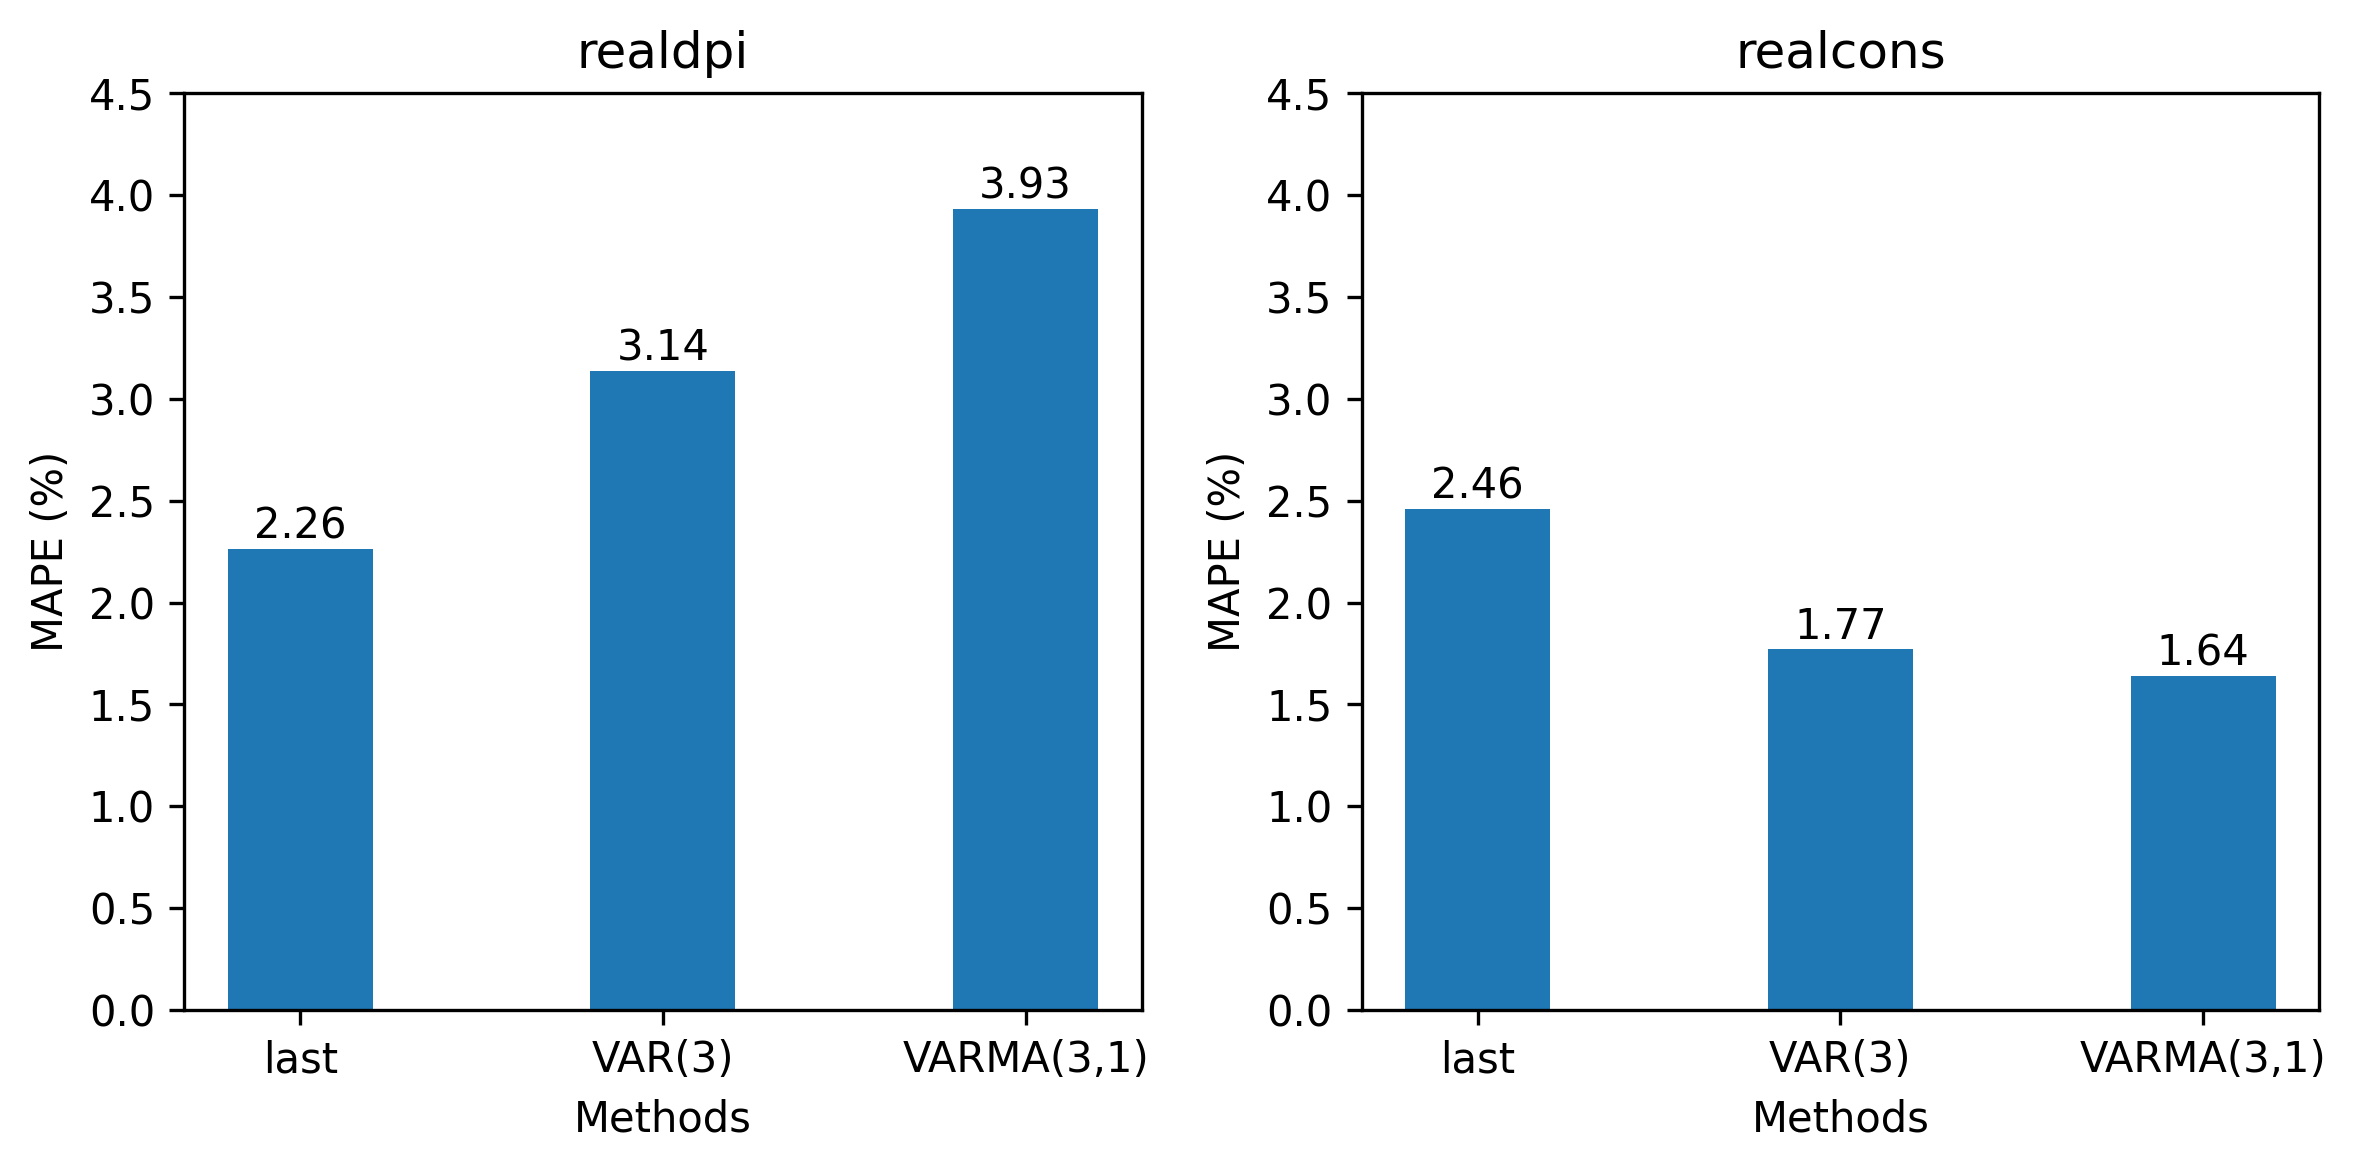

In [32]:
# Visualize which model has the lowest mean absolute percentage error (MAPE).
fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=300, figsize=(8, 4))

x1 = ['last', 'VAR(3)', 'VARMA(3,1)']
y1 = [mape_realdpi_last, mape_realdpi_VAR, mape_realdpi_VARMA]

ax1.bar(x1, y1, width=0.4)
ax1.set_title('realdpi')
ax1.set_xlabel('Methods')
ax1.set_ylabel('MAPE (%)')
ax1.set_ylim(0, 4.5)

# Display the MAPE as text in the bar plot
for index, value in enumerate(y1):
    ax1.text(x=index, y=value +0.05, s=str(round(value, 2)), ha='center')

x2 = ['last', 'VAR(3)', 'VARMA(3,1)']
y2 = [mape_realcons_last, mape_realcons_VAR, mape_realcons_VARMA]

ax2.bar(x2, y2, width=0.4)
ax2.set_title('realcons')
ax2.set_xlabel('Methods')
ax2.set_ylabel('MAPE (%)')
ax2.set_ylim(0, 4.5)

# Display the MAPE as text in the bar plot
for index, value in enumerate(y2):
    ax2.text(x=index, y=value +0.05, s=str(round(value, 2)), ha='center')

plt.tight_layout()

In [33]:
# The VARMA(3,1) model performs worse than both the baseline and VAR(3) in the case of realdpi, but is best for realcons

In [34]:
# Record end time

end = dt.now()
elapsed = end - start

print("The program took: %02d:%02d:%02d:%02d" % (elapsed.days, elapsed.seconds // 3600, elapsed.seconds // 60 % 60, elapsed.seconds % 60))

The program took: 00:00:02:12
